# **Assignment-13-KNN-Zoo**

In [ ]:
# Import liabraries
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [ ]:
# Import dataset
zoo=pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
# Data filtering
X= zoo.iloc[:, 1:17]
Y= zoo.iloc[:,17]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
def get_standardized_val(data):
    zoo_norm=(data-data.min())/(data.max()-data.min())
    return(zoo_norm)

In [ ]:
X=get_standardized_val(X)
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


In [ ]:
# Building the model

model= KNeighborsClassifier(n_neighbors=5)
model.fit(X,Y)

KNeighborsClassifier()

In [ ]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [ ]:
#Since the class 5 has just 4 data points hence we keep the n_splits as 3

kfold=KFold(n_splits=3)
kfold

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
cvs=cross_val_score(model,X.values,Y,cv=kfold)

In [ ]:
print(cvs.mean())

0.9096850861556743


In [ ]:
# Checking model on 2 random datapoints

predict_val=zoo.iloc[99:101,1:17]
predict_val

model.predict(predict_val)

array([6, 2])

In [ ]:
zoo.iloc[99:101,17]

99     7
100    2
Name: type, dtype: int64

In [ ]:
# Finding optimal number of neighbours

optimal_neighbors = [2*i+1 for i in range(0,10)]
cvsl =[]
for size in optimal_neighbors:
    model=KNeighborsClassifier(n_neighbors=size)
    model.fit(X,Y)
    cvs=cross_val_score(model,X,Y,cv=3)
    print("no of neighbors: "+str(size)+"     Average Score: "+str(cvs.mean()))
    cvsl.append(cvs.mean())

no of neighbors: 1     Average Score: 0.9503862150920974
no of neighbors: 3     Average Score: 0.94058229352347
no of neighbors: 5     Average Score: 0.9402852049910874
no of neighbors: 7     Average Score: 0.9007724301841948
no of neighbors: 9     Average Score: 0.9007724301841948
no of neighbors: 11     Average Score: 0.8906714200831848
no of neighbors: 13     Average Score: 0.8612596553773025
no of neighbors: 15     Average Score: 0.8416518122400475
no of neighbors: 17     Average Score: 0.82174688057041
no of neighbors: 19     Average Score: 0.8116458704693997


(0.6, 1.2)

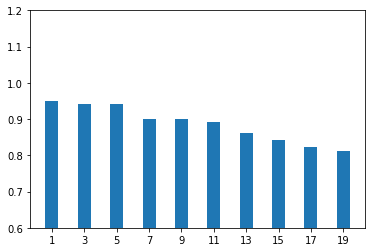

In [ ]:
plt.bar(optimal_neighbors,cvsl)
plt.xticks(optimal_neighbors)
plt.ylim(0.6,1.2)

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X,Y)
cvs=cross_val_score(model,X,Y,cv=kfold)
cvs.mean()

0.9096850861556743

In [ ]:
model.predict(predict_val)

array([7, 2])

 Even though 1 gives higher accuracy , we choose 3 as optimal number beacuse just considering 1 nearest neighbour is inadequate to reach a conclusion

Hence optimum number of neighbours is 3 with accuracy 0.9096 for KNN

# **Prepare a model for glass classification using KNN**

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
X= df.iloc[:,:9]
Y= df.iloc[:,9]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
# Standardizing the data

def get_standardized_data(data):
    df_norm = (data-data.min())/(data.max()-data.min())
    return(df_norm)

In [ ]:
X=get_standardized_data(X)
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [ ]:
# Building the model

model= KNeighborsClassifier(n_neighbors=8)
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
#Since the class  6 has just 9 data points hence we keep the n_splits as 4

kfold=KFold(n_splits=2)
kfold

KFold(n_splits=2, random_state=None, shuffle=False)

In [ ]:
cvs=cross_val_score(model,X.values,Y,cv=kfold)

In [ ]:
print(cvs.mean())

0.205607476635514


In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X,Y)
cvs=cross_val_score(model,X,Y,cv=kfold)
print(cvs.mean())

0.21028037383177567


In [ ]:
# Finding optimal number of neighbours

noofneighbours = [2*i+1 for i in range(0,10)]
cvsl =[]
for neighbours in noofneighbours:
    model = KNeighborsClassifier(n_neighbors=neighbours)
    model.fit(X,Y)
    cvs=cross_val_score(model,X,Y,cv=9)
    print("no of neighbours: "+str(neighbours)+"     Average Score: "+str(cvs.mean()))
    cvsl.append(cvs.mean())

no of neighbours: 1     Average Score: 0.6773349436392915
no of neighbours: 3     Average Score: 0.6539855072463767
no of neighbours: 5     Average Score: 0.6497584541062802
no of neighbours: 7     Average Score: 0.6215780998389694
no of neighbours: 9     Average Score: 0.6024557165861514
no of neighbours: 11     Average Score: 0.5791062801932366
no of neighbours: 13     Average Score: 0.5933977455716586
no of neighbours: 15     Average Score: 0.5980273752012883
no of neighbours: 17     Average Score: 0.5793075684380032
no of neighbours: 19     Average Score: 0.5933977455716586


In [ ]:
model=KNeighborsClassifier(n_neighbors=4)
model.fit(X,Y)
cvs=cross_val_score(model,X,Y,cv=kfold)
cvs.mean()

0.21495327102803735

(0.0, 1.4)

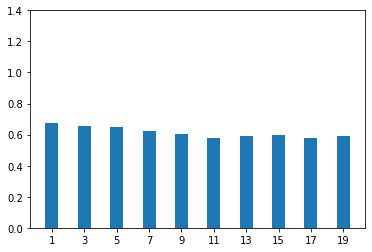

In [ ]:
plt.bar(noofneighbours,cvsl)
plt.xticks(noofneighbours)
plt.ylim(0.0,1.4)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,Y)
cvs=cross_val_score(model,X,Y,cv=9)
cvs.mean()

0.6539855072463767

In [ ]:
# Checking model on 2 random datapoints

X= df.iloc[212:214,:9]
Y= df.iloc[212:214,9]

In [ ]:
model.predict(X)

array([6, 6])

 Even though 1 gives higher accuracy , we choose 3 as optimal number beacuse just considering 1 nearest neighbour is inadequate to reach a conclusion

 Hence optimum number of neighbours is 3 with accuracy 0.653 for KNN